Importamos las librerias necesarias.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import os

Creamos un array con los nombres de los documentos de la carpeta "Data", y limitamos para obtener los ultimos 7.

In [33]:
files = os.listdir("./Data/")[-7:]

In [34]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

Eliminamos el archivo con un nombre en específico del array.

In [35]:
files.remove("uber-raw-data-janjune-15.csv")

In [36]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

Importamos los archivos con los nombres del array y los juntamos todos en el mismo dataframe.

In [37]:
path = "./Data/"

final = pd.DataFrame()

for file in files:
    df = pd.read_csv(path + file, encoding="utf-8")
    final = pd.concat([df, final])

In [38]:
final.shape

(4534327, 4)

Copiamos el dataframe en otra variable para poder manipularlo.

In [39]:
df = final.copy()

In [40]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [41]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

Ponemos en formato de fecha la columna "Date/Time" del dataframe.

In [42]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%m/%d/%Y %H:%M:%S")

In [43]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [44]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


Creamos columnas auxiliares para verificar la columna de fechas.

In [45]:
df["weekday"] = df["Date/Time"].dt.day_name()

In [46]:
df["day"] = df["Date/Time"].dt.day

In [47]:
df["minute"] = df["Date/Time"].dt.minute
df["month"] = df["Date/Time"].dt.month
df["hours"] = df["Date/Time"].dt.hour

In [48]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hours
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [49]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hours                 int64
dtype: object

Graficamos la frecuencia de las fechas por día de la semana.

In [52]:
import plotly.express as px

In [66]:
df["weekday"].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

In [72]:
fig = px.bar(df, x = df["weekday"].value_counts().index, y = df["weekday"].value_counts(), title = "Weekday", color = df["weekday"].value_counts().index, width=1000, height=600)
fig.show()

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

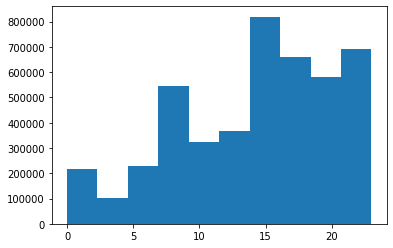

In [74]:
plt.hist(df["hours"])

In [75]:
df["month"].unique()

array([9, 5, 6, 7, 8, 4], dtype=int64)

In [78]:
for i, month in enumerate(df["month"].unique()):
    print(i) 
    print(month)

0
9
1
5
2
6
3
7
4
8
5
4


In [106]:
import calendar

In [112]:
df["hours"].value_counts().index

Int64Index([17, 18, 16, 19, 20, 21, 15, 22, 14, 13,  7,  8, 12, 23, 11,  9, 10,
             6,  0,  5,  1,  4,  3,  2],
           dtype='int64')

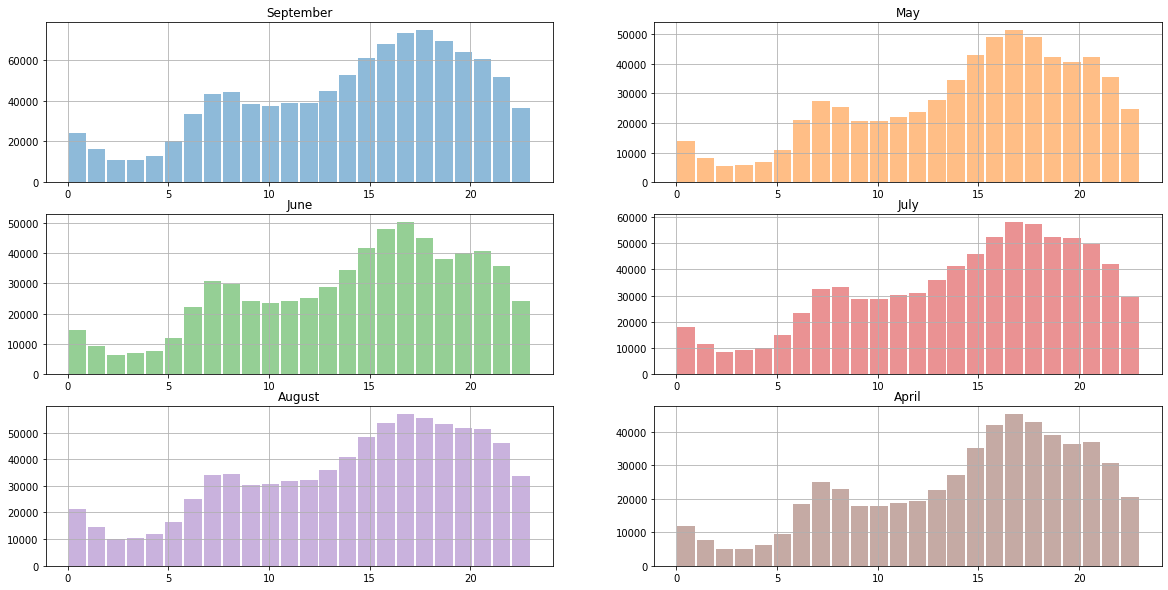

In [129]:
f = plt.figure(figsize=(20,10))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]
for i, month in enumerate(df["month"].unique()):
    plt.subplot(3, 2, i+1, title=calendar.month_name[month])
    df[df["month"]== month]["hours"].hist(color=colors[i], alpha=0.5, rwidth=0.9, bins=24)